# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


1. I build the model which identifies wheteher the person is going to leave a generous tip(>= 20%)

2. The model's target is to classify the customer's likelihood to leave a generous tip. Overall, capturing accuracy seems to make the most sense out of all available metrics as it is mostly informative and it must help to let driver to predict his earnings more precisely beforehand. Nevertheless, I see the scenario where precision may be the most important metric so we can be sure that the identified generous customer is the most likely to fulfill the requirements. Yet the initial hypothesis will be used as the basis due to bigger variety of use cases its results can be used into.

5. It is worth clarifying whether NYC TLC would prefer the exact accuracy of the model overall or either of the following variants: optimized model for identifying non-generous tippers or, otherwise, generous tippers  

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


1. We will use the features availablke at the moment of booking the car(pickup time, trip distance, fare amount, etc.)
2. Tip amount is the target variable
3. Considering the particularly stated goal of the client(ensuring that generous tippers are identified), we refit our model based on precision metric, so true positives are predicted the most accurately 


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np

from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [6]:
# Merge datasets
df = pd.concat([df0, nyc_preds_means], axis=1)

In [7]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [9]:
# Subset the data to isolate only customers who paid by credit card
df1 = df[df['payment_type'] == 1]

In [10]:
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [11]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case. 

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  
Refer to this [guide for more information related to fixed-point arithmetic](https://inst.eecs.berkeley.edu/~cs61c/sp06/handout/fixedpt.html), which is an alternative to floating-point arithmetic used in certain cases.

In [12]:
# Create tip % col
df['tip_percent'] = round(df['tip_amount']/(df['total_amount'] - df['tip_amount']), 2)*100

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [13]:
# Create 'generous' col (target)
df['generous'] = df['tip_percent'].apply(lambda x: 1 if x>=20 else 0)

<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [14]:
# Convert pickup and dropoff cols to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [15]:
# Create a 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name()


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [16]:
df["am_rush"] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if x>=6 and x <10 else 0)

df["daytime"] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if x>=10 and x <16 else 0)

df["pm_rush"] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if x>=16 and x <20 else 0)

df["nighttime"] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if x>=20 or x <6 else 0)

In [17]:
df["hour"] = df['tpep_pickup_datetime'].dt.hour

In [18]:
# Create 'am_rush' col
#==> ENTER YOUR CODE HERE

# Create 'daytime' col
#==> ENTER YOUR CODE HERE

# Create 'pm_rush' col
#==> ENTER YOUR CODE HERE

# Create 'nighttime' col
#==> ENTER YOUR CODE HERE

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [19]:
# Define 'am_rush()' conversion function [06:00–10:00)
    #==> ENTER YOUR CODE HERE

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [20]:
# Apply 'am_rush' function to the 'am_rush' series
#==> ENTER YOUR CODE HERE

Write functions to convert the three remaining columns and apply them to their respective series.

In [21]:
# Define 'daytime()' conversion function [10:00–16:00)
#==> ENTER YOUR CODE HERE

In [22]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE

In [23]:
# Define 'pm_rush()' conversion function [16:00–20:00)
#==> ENTER YOUR CODE HERE

In [24]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE

In [25]:
# Define 'nighttime()' conversion function [20:00–06:00)
#==> ENTER YOUR CODE HERE

In [26]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [27]:
# Create 'month' col
df["month"] = df['tpep_pickup_datetime'].dt.month_name()

Examine the first five rows of your dataframe.

In [28]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,hour,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,20.0,1,Saturday,1,0,0,0,8,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,24.0,1,Tuesday,0,1,0,0,14,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,20.0,1,Friday,1,0,0,0,7,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,30.0,1,Sunday,0,1,0,0,13,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642,0.0,0,Saturday,0,0,0,1,23,April


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [29]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'mean_duration', 'mean_distance', 'predicted_fare', 'tip_percent',
       'generous', 'day', 'am_rush', 'daytime', 'pm_rush', 'nighttime', 'hour',
       'month'],
      dtype='object')

In [30]:
#cols_to_drop = ['Unnamed: 0', 'trip_distance', 'tpep_pickup_datetime',
       #'tpep_dropoff_datetime', 'store_and_fwd_flag', 'payment_type', 'extra', 'mta_tax', 'tip_amount',
       #'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent','hour','month']

In [31]:
cols_to_drop = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

In [32]:
# Drop columns
df.drop(columns = cols_to_drop, axis=1, inplace=True)


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [33]:
# 1. Define list of cols to convert to string
cols_to_str = ["RatecodeID", "PULocationID", "DOLocationID"]

# 2. Convert each column to string
for col in cols_to_str:
    df[col] = df[col].astype("str")



<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [34]:
# Convert categoricals to binary
df2 = pd.get_dummies(df)

In [35]:
df2

,VendorID,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,hour,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_118,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_14,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_159,PULocationID_160,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_168,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_175,PULocationID_178,PULocationID_179,PULocationID_181,PULocationID_185,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_195,PULocationID_196,PULocationID_197,PULocationID_200,PULocationID_202,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_215,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_228,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_235,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_242,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_29,PULocationID_31,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_46,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_54,PULocationID_55,PULocationID_56,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_63,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_69,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_78,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_83,PULocationID_85,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_94,PULocationID_95,PULocationID_97,DOLocationID_1,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_149,DOLocationID_15,DOLocationID_150,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_171,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_18,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_18

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [36]:
# Get class balance of 'generous' col
df2["generous"].value_counts(normalize=True)

0    0.531301
1    0.468699
Name: generous, dtype: float64

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

We settle on f1 score. It balances out precision and recall

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [37]:
df2.head()

,VendorID,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,hour,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_118,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_14,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_159,PULocationID_160,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_168,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_175,PULocationID_178,PULocationID_179,PULocationID_181,PULocationID_185,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_195,PULocationID_196,PULocationID_197,PULocationID_200,PULocationID_202,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_215,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_228,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_235,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_242,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_29,PULocationID_31,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_46,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_54,PULocationID_55,PULocationID_56,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_63,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_69,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_78,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_83,PULocationID_85,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_94,PULocationID_95,PULocationID_97,DOLocationID_1,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_149,DOLocationID_15,DOLocationID_150,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_171,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_18,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_18

In [38]:
# Isolate target variable (y)
y = df2["generous"]

# Isolate the features (X)
X = df2.drop("generous", axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [39]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [10, 50],
    'max_features': ['auto', 'sqrt'],
    'max_samples': [0.5, 0.8],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2, 5],
    'n_estimators': [100, 300]}
# 3. Define a dictionary of scoring metrics to capture
scoring = {"precision", "recall", "f1", "accuracy"}

# 4. Instantiate the GridSearchCV object
#rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, refit='f1', cv=5)

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [40]:
#%%time
#rf_cv.fit(X_train, y_train)

CPU times: user 17min 5s, sys: 6.17 s, total: 17min 11s
Wall time: 17min 11s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [41]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [42]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [45]:
#write_pickle("", rf_cv, "trained_model.pickle")

In [46]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [47]:
rf_cv = read_pickle("", "trained_model.pickle")

Examine the best average score across all the validation folds. 

In [48]:
# Examine best score
rf_cv.best_score_

0.45027032040518933

Examine the best combination of hyperparameters.

In [49]:
rf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [50]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [51]:
table_rf = make_results("RandomForestClassifier", rf_cv, "f1")

In [52]:
table_rf

,model,precision,recall,F1,accuracy
0,RandomForestClassifier,0.517415,0.398661,0.45027,0.543973


A model with such low F1, precision, and recall scores is not good enough. Optional: try to improve the scores. Generally, unless your hyperparameter search space is completely off the mark, you won't get the degree of improvement you need to approve this model. However, it's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

The process is more simple and straightforward. However, the addittional bias is introduced as the models are tested on the same dataset

In [53]:
# Get scores on test data
rf_preds = rf_cv.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [54]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [55]:
 # Get scores on test data
rf_test_scores = get_test_scores("RandomForestClassifier", rf_preds, y_test)

In [56]:
rf_test_scores

,model,precision,recall,F1,accuracy
0,RandomForestClassifier,0.530359,0.402256,0.457509,0.552863


**Question:** How do your test results compare to your validation results?

For some reason, model performs TWICE better on test data than on validation set

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [60]:
# 1. Instantiate the XGBoost classifier
xgbc = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [3, 6],
    'min_child_weight': [1, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 300]
}


# 3. Define a dictionary of scoring metrics to capture
scoring = scoring #It helps!!!

# 4. Instantiate the GridSearchCV object
#xgb_cv = GridSearchCV(xgbc, cv_params, cv=5, scoring=scoring, refit="f1")

Now fit the model to the `X_train` and `y_train` data.

In [61]:
#%%time
#xgb_cv.fit(X_train, y_train)


CPU times: user 41min 16s, sys: 6.53 s, total: 41min 22s
Wall time: 20min 48s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

In [62]:
#write_pickle("", xgb_cv, "XGBoostClassifier_trained_model.pickle")
xgb_cv = read_pickle("", "XGBoostClassifier_trained_model.pickle")

Get the best score from this model.

In [63]:
# Examine best score
xgb_cv.best_score_

0.45426671082028236

And the best parameters.

In [64]:
# Examine best parameters
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [65]:
# Call 'make_results()' on the GridSearch object
table_xgb = make_results("XGBClassifier", rf_cv, "f1")

In [66]:
table_xgb

,model,precision,recall,F1,accuracy
0,XGBClassifier,0.517415,0.398661,0.45027,0.543973


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [67]:
# Get scores on test data
xgb_preds = xgb_cv.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [68]:
# Get scores on test data
xgb_test_scores = get_test_scores("XGBoostClassifier", xgb_preds, y_test)

In [69]:
comparing_table = pd.concat([rf_test_scores, xgb_test_scores], axis=0)

In [70]:
comparing_table

,model,precision,recall,F1,accuracy
0,RandomForestClassifier,0.530359,0.402256,0.457509,0.552863
0,XGBoostClassifier,0.525301,0.409774,0.460401,0.549780


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

Random Forest is ridiculously better. I choose it

Plot a confusion matrix of the model's predictions on the test data.

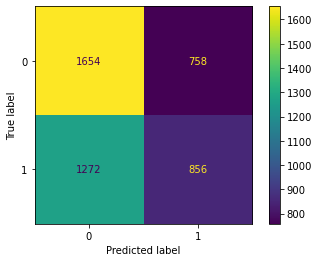

In [71]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
display.plot(values_format="")

In [72]:
print(recall_score(y_test, rf_preds))
precision_score(y_test, rf_preds)

0.40225563909774437


0.530359355638166

**Question:** What type of errors are more common for your model?

Type II error is more common, where the model mostly fails to predict true positive accurately

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

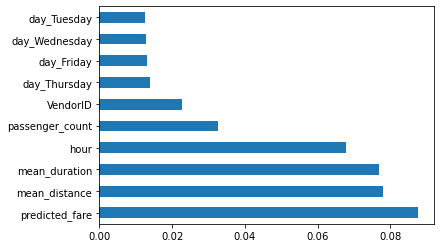

In [73]:
feat_importances = pd.Series(rf_cv.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

Despite outstanding performance of the Random Forest Classifier model on the test data, it seems that it is an accidental occassion rather than the stable accuracy, considering the the level of performance on the validation data. Overall, the model is quite weak at predicting both true positives and true negatives, so the additional work is needed. The most obvious solution is to find out some of the additional features which could determine the likelihood of the passenger to be generous tipper.  

2. **What was your model doing? Can you explain how it was making predictions?**   
The model is taking the data available at the moment of the customer ordering the car and then predicts whether he will tip more than 20 percents based on the facts.

3. **Are there new features that you can engineer that might improve model performance?**   
I am sure there are, but I am not aware of them yet

4. **What features would you want to have that would likely improve the performance of your model?**   
I am sure that some demographical information about the customer could provide the algorithm with stronger predictive signals so the precision and recall of the model could be improved.


Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.